## Matrices、Colore、Filters

### Manipulating matrices-creating, filling, accessing elements and ROIs (P104)
ROI（region of interest） 感興趣的區域

In [1]:
import cv2 , numpy as np
from matplotlib import pyplot as plt

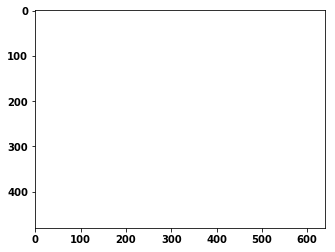

In [2]:
image = np.full((480,640,3),255, np.uint8)
cv2.imshow('white', image)
cv2.waitKey()
cv2.destroyAllWindows()
plt.imshow(image)

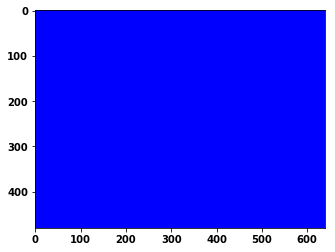

In [3]:
image = np.full((480,640,3),(0,0,255), np.uint8)
cv2.imshow('Red', image)
cv2.waitKey()
cv2.destroyAllWindows()
plt.imshow(image)   #註:matpotlib的三顏色順序(RGB)跟CV的(BGR)不同

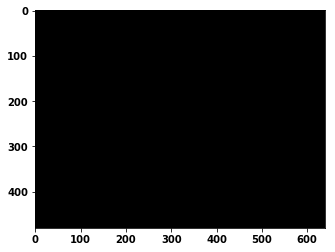

In [4]:
image.fill(0)
cv2.imshow('Black', image)
cv2.waitKey()
cv2.destroyAllWindows()
plt.imshow(image)

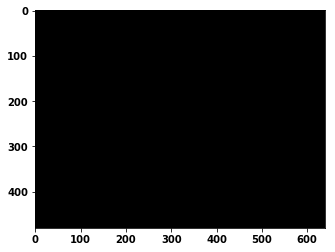

In [5]:
image[240,160] = image[240,320] = (255, 255, 255)
cv2.imshow('Black with white pixels', image)
cv2.waitKey()
cv2.destroyAllWindows()
plt.imshow(image)   #註:matpotlib的三顏色順序(RGB)跟CV的(BGR)不同

In [6]:
image[:,:,0] = 255  # [0, 0, 0] => [255, 0, 0]
cv2.imshow('Blue with white pixels', image)
cv2.waitKey()
cv2.destroyAllWindows()

In [7]:
image[:,320,:] = 255  #  width = 320 處的所有 [, , ] => [255,255, 255]
cv2.imshow('Blue with white line', image)
cv2.waitKey()
cv2.destroyAllWindows()

In [8]:
image[100:600,100:200,2] =255
# height 100:600
# width 100:200
# [ , , **] => [ , , 255]

cv2.imshow('image', image)
cv2.waitKey()
cv2.destroyAllWindows()

### Converting between different data types and scaling values

In [9]:
import cv2, numpy as np
image = cv2.imread('./275725.jpg')

In [10]:
print('Shape: ',image.shape)
print('Data type: ',image.dtype)
cv2.imshow('image',image)
cv2.waitKey()
cv2.destroyAllWindows()

Shape:  (1108, 1477, 3)
Data type:  uint8


In [11]:
image = image.astype(np.float32)/255
print('Shape: ',image.shape)
print('Data type: ',image.dtype)

Shape:  (1108, 1477, 3)
Data type:  float32


numpy.clip(a, a_min, a_max, out=None)<br>
超出的值會設為邊界

In [12]:
cv2.imshow('image',np.clip(image*2,0,1))
cv2.waitKey()
cv2.destroyAllWindows()

In [13]:
image = (image*255).astype(np.uint8)
print('Shape: ',image.shape)
print('Data type: ',image.dtype)
cv2.imshow('image',image)
cv2.waitKey()
cv2.destroyAllWindows()

Shape:  (1108, 1477, 3)
Data type:  uint8


### Non-image data persistence using Numpy
#### np.savetxt('mat.csv', mat)

In [14]:
import cv2, numpy as np
mat = np.random.rand(100,100).astype(np.float32)
print('Shape: ',mat.shape)
print('Data type: ',mat.dtype)

Shape:  (100, 100)
Data type:  float32


In [15]:
#save the matrix to the file with the np.savetxt()
np.savetxt('mat.csv', mat)

In [16]:
mat = np.loadtxt('mat.csv')
print('Shape: ',mat.shape)
print('Data type: ',mat.dtype)
mat = mat.astype(np.float32)
print('Shape: ',mat.shape)
print('Data type: ',mat.dtype)

Shape:  (100, 100)
Data type:  float64
Shape:  (100, 100)
Data type:  float32


### Manipulating image channels
numpy中<br>
uin8 [0~255]<br>
float [-1~1] or [0~1]<br>
uin8 => float 稱為 Gray scale<br>
<br>
opencv中imshow內部的參數類型可以分為兩種。<br>
1.當輸入矩陣是uint8類型，此時imshow顯示圖像時，會認為輸入矩陣的範圍在0-255之間。<br>
2.如果imshow的參數是double類型的時候，imshow會認為輸入矩陣的範圍在0-1<br>
%倘若圖像矩陣（double型）的矩陣元素不在0-1之間，那麼imshow會把超過1的元素都顯示為白色

In [17]:
import cv2, numpy as np
image = cv2.imread('./275725.jpg').astype(np.float32)/255
print('Shape: ',image.shape)

Shape:  (1108, 1477, 3)


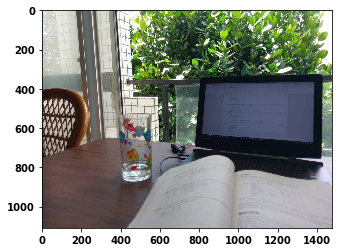

In [18]:
image[:,:,[0,2]] = image[:,:,[2,0]]
cv2.imshow('blue_and_red_swapped', image)
cv2.waitKey()
cv2.destroyAllWindows()
plt.imshow(image)

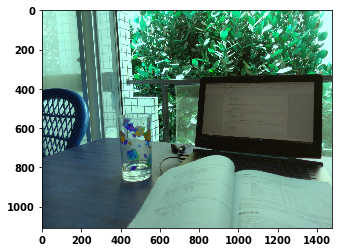

In [19]:
image[:,:,[0,2]] = image[:,:,[2,0]] #換回來
image[:,:,0] = (image[:,:,0]*0.8).clip(0,1)
image[:,:,1] = (image[:,:,1]*1.1).clip(0,1)
cv2.imshow('image',image)
cv2.waitKey()
cv2.destroyAllWindows()
plt.imshow(image)

### Converting images from one color space to another


In [20]:
import cv2, numpy as np
image = cv2.imread('./275725.jpg').astype(np.float32)/255
print('Shape: ',image.shape)
print('Data type: ',image.dtype)

Shape:  (1108, 1477, 3)
Data type:  float32


#### HSV即色相、飽和度、明度（英語：Hue, Saturation, Value），又稱HSB，其中B即英語：Brightness。
<b>色相（H）:</b>色彩的基本屬性，就是平常所說的顏色名稱，如紅色、黃色等。<br>
<b>飽和度（S）:</b>色彩的純度，越高色彩越純，低則逐漸變灰，取0-100%的數值。<br>
<b>明度（V）、亮度（L）:</b>取0-100%。

In [22]:
# to HSV
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
print('Converted to HSV')
print('Shape: ',hsv.shape)
print('Data type: ',hsv.dtype)
cv2.imshow('HSV',hsv)
cv2.waitKey()
cv2.destroyAllWindows()

Converted to HSV
Shape:  (1108, 1477, 3)
Data type:  float32


In [23]:
# to HSV
hsv[:,:,2] *= 2
from_hsv = cv2.cvtColor(hsv, cv2.COLOR_HLS2BGR)
print('Converted back to BGR from HSV')
print('Shape: ',from_hsv.shape)
print('Data type: ',from_hsv.dtype)
cv2.imshow('from_hsv',from_hsv)
cv2.waitKey()
cv2.destroyAllWindows()

Converted back to BGR from HSV
Shape:  (1108, 1477, 3)
Data type:  float32


### Gamma correction and per-element math
#### 伽馬校正（Gamma correction） 又叫伽馬非線性化（gamma nonlinearity）、伽馬編碼（gamma encoding）或是就只單純叫伽馬（gamma）。
用來針對影片或是影像系統裡對於光線的輝度（luminance）或是三色刺激值（tristimulus values）所進行非線性的運算或反運算。為圖像進行伽馬編碼的目的是用來對人類視覺的特性進行補償，從而根據人類對光線或者黑白的感知。圖像的伽馬編碼並不是必須的（甚至有的時候會適得其反），浮點數格式的顏色值已經提供了一部分對數曲線的線性估計。

In [24]:
import cv2, numpy as np
image = cv2.imread('./275725.jpg').astype(np.float32)/255
gamma = 0.5
corrected_image = np.power(image,gamma)

In [25]:
cv2.imshow('image',image)
cv2.imshow('corrected_image',corrected_image)
cv2.waitKey()
cv2.destroyAllWindows()

### Mean/variance image normalization

In [26]:
import cv2, numpy as np
image = cv2.imread('./275725.jpg').astype(np.float32)/255
mean_image = image-image.mean()  #變小 = 變黑
std_image = image/image.std()   #優化梯度下降，提高精準度
cv2.imshow('image',image)
cv2.imshow('mean_image',mean_image)
cv2.imshow('std_image',std_image)
cv2.waitKey()
cv2.destroyAllWindows()

### Computing image histograms

In [27]:
import cv2, numpy as np, matplotlib.pyplot as plt

In [28]:
grey = cv2.imread('./275725.jpg',0)
cv2.imshow('original grey', grey)
cv2.waitKey()
cv2.destroyAllWindows()

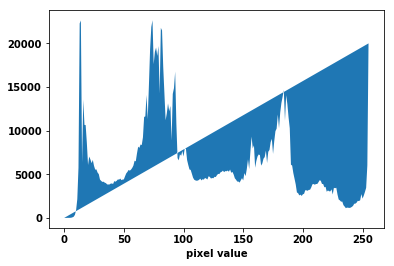

In [29]:
hist, bin_egdes = np.histogram(grey, 256, [0,255])  #histogram(array,bin,range)
plt.fill(hist) 
plt.xlabel('pixel value')
plt.show()
#註: cv2.calcHist 比較複雜
# the 'fill function' is for filling the region within closed polygons

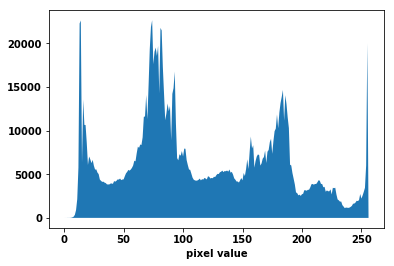

In [30]:
#adjust the array back to the y=0 closed ploygons 多邊型
hist_adjust = np.append(hist,0)
plt.fill(hist_adjust)
plt.xlabel('pixel value')
plt.show()

### Equalizing image histograms
Most of the pixels have their values within a narrow range. Low-contrast images are harder to work with because small details are poorly expressed. <br>
Note that it takes only single-channel images (HSV or grey)<br>
通過這種方法，亮度可以更好地在直方圖上分布。這樣就可以用於增強局部的對比度而不影響整體的對比度。這種方法對於背景和前景都太亮或者太暗的圖像非常有用，這種方法尤其是可以帶來X光圖像中更好的骨骼結構顯示以及曝光過度或者曝光不足照片中更好的細節。缺點是它對處理的數據不加選擇，它可能會增加背景雜訊的對比度並且降低有用訊號的對比度。<br>
https://zh.wikipedia.org/wiki/%E7%9B%B4%E6%96%B9%E5%9B%BE%E5%9D%87%E8%A1%A1%E5%8C%96

In [31]:
import cv2, numpy as np, matplotlib.pyplot as plt

In [32]:
grey = cv2.imread('./275725.jpg',0)
cv2.imshow('original grey', grey)
cv2.waitKey()
cv2.destroyAllWindows()

In [33]:
grey_eq = cv2.equalizeHist(grey)

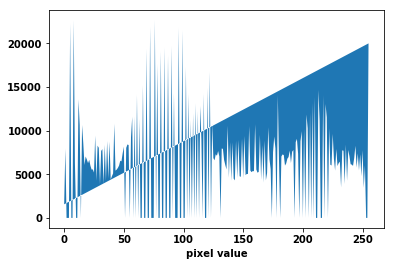

In [34]:
hist, bin_egdes = np.histogram(grey_eq, 256, [0,255])  #histogram(array,bin,range)
plt.fill(hist)  #對函數與坐標軸之間的區域進行填充，使用fill函數
plt.xlabel('pixel value')
plt.show()

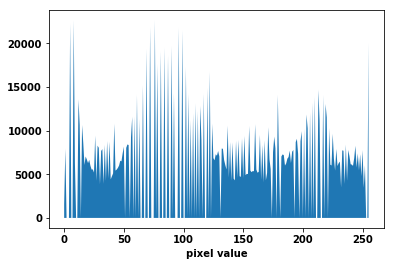

In [35]:
# the 'fill_between' function is for the area between curves. 
plt.fill_between(range(256),hist,0)
plt.xlabel('pixel value')
plt.show()

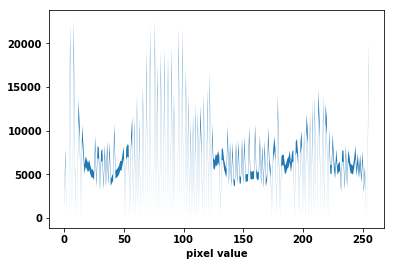

In [36]:
#衍伸
plt.fill_between(range(256),hist,hist/1.2)  # (x ,curve1 ,curve2)
plt.xlabel('pixel value')
plt.show()

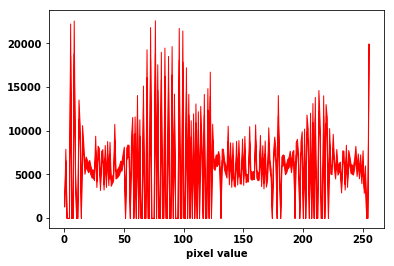

In [37]:
#衍伸
plt.fill_between(range(256),hist,hist/1.2, color='r')  # (x ,curve1 ,curve2)
plt.xlabel('pixel value')
plt.show()

In [38]:
cv2.imshow('equalized grey',grey_eq)  #對比比較強烈
cv2.imshow('original grey', grey)
cv2.waitKey()
cv2.destroyAllWindows()

In [39]:
# Load the image as BGR and convert it to the'HSV',and equalizing the hist
color = cv2.imread('./275725.jpg')
hsv = cv2.cvtColor(color, cv2.COLOR_BGR2HSV)
hsv[...,2] = cv2.equalizeHist(hsv[...,2])
color_eq = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
cv2.imshow('original color', color)
cv2.imshow('equalized color',color_eq)
cv2.waitKey()
cv2.destroyAllWindows()

### Removing noise using Gaussian, median, and bilateral filters(P150)

In [ ]:
import cv2, numpy as np, matplotlib.pyplot as plt

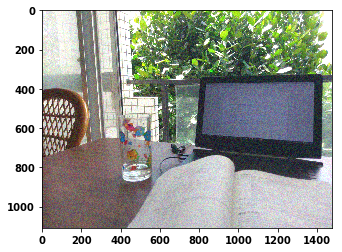

In [43]:
image = cv2.imread('./275725.jpg').astype(np.float32)/255
noised = (image+0.2*np.random.rand(*image.shape).astype(np.float32))
noised = noised.clip(0,1)
plt.imshow(noised[:,:,[2,1,0]])  #[2,1,0] => 調整BGR to RGB
plt.show() 

#### Gaussian 高斯平滑
減少圖像雜訊以及降低細節層次(低通濾波器)，圖像的高斯模糊過程就是圖像與常態分布(高斯分布)做卷積

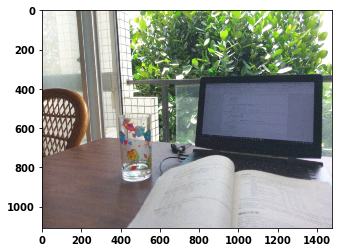

In [57]:
gauss_bur = cv2.GaussianBlur(noised, (7,7), 0)   #windom = (7x7)
plt.imshow(gauss_bur[:,:,[2,1,0]])
plt.show()

#### median 中值濾波
中值濾波屬於非線性（Non-linear）濾波的一種，中值濾波是圖像處理中的一個常用步驟，觀察窗口(奇數)中的數值進行排序，位於觀察窗中間的中值作為輸出。然後，丟棄最早的值，取得新的採樣，重複上面的計算過程。對於斑點噪聲和椒鹽噪聲來說尤其有用。保存邊緣的特性使它在不希望出現邊緣模糊的場合也很有用。半徑越大，細節越少。<br>
https://zh.wikipedia.org/wiki/%E4%B8%AD%E5%80%BC%E6%BB%A4%E6%B3%A2%E5%99%A8

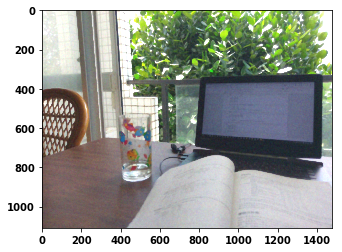

In [58]:
median_bur = cv2.medianBlur((noised*255).astype(np.uint8), 7) #windom = (7x7)
plt.imshow(median_bur[:,:,[2,1,0]])
plt.show()
#中值濾波是圖像處理中的一個常用步驟，它對於斑點噪聲和椒鹽噪聲來說尤其有用。保存邊緣的特性使它在不希望出現邊緣模糊的場合也很有用。


#### Bilateral Filter 雙邊濾波
<li>對於影像中的每一個點，都要對鄰近的所有點進行加權平均，以達到平滑化的目的，而對此，雙邊濾波器在鄰近的點採取了不同的權重。
<li>雙邊濾波器除了使用像素之間幾何上的靠近程度之外，還多考慮了像素之間的光度/色彩差異， 使得雙邊濾波器能夠有效的將影像上的雜訊去除，同時保存影像上的邊緣資訊。
<li>為非線性濾波器，因此在實作上無法使用傅立葉變換來幫助運算。 如果使用暴力演算法需要很大的時間來進行運算

https://zh.wikipedia.org/wiki/%E9%9B%99%E9%82%8A%E6%BF%BE%E6%B3%A2%E5%99%A8

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


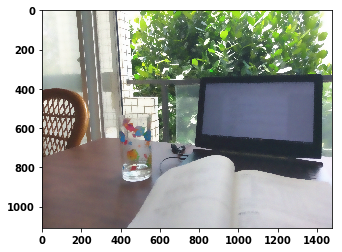

In [61]:
#cv2.bilateralFilter(src, d, sigmaColor, sigmaSpace)
# (array, window , 空間高斯函數標準差，灰度值相似性高斯函數標準差)
# If d is non-positive, it is computed from sigmaSpace
bilat = cv2.bilateralFilter(noised, -1, 0.3, 10) 
plt.imshow(bilat[:,:,[2,1,0]])
plt.show()

#### 均值濾波
均值濾波直觀地理解就是用相鄰元素灰度值的平均值代替該元素的灰度值


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


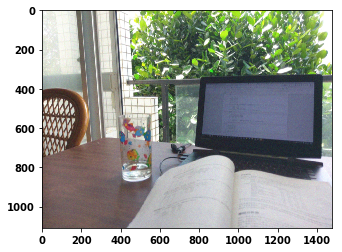

In [60]:
bilat = cv2.blur(noised, (3, 5)) #模板大小3*5
plt.imshow(bilat[:,:,[2,1,0]])
plt.show()

### Computing gradient images using Sobel filters
Sobel是一種獲得影像一階梯度的手法，常見應用於邊緣檢測，有分成水平和垂直方向的模板
http://monkeycoding.com/?p=632

In [65]:
import cv2, numpy as np, matplotlib.pyplot as plt
image = cv2.imread('./275725.jpg',0)

In [66]:
dx = cv2.Sobel(image, cv2.CV_32F, 1, 0)
dy = cv2.Sobel(image, cv2.CV_32F, 0, 1)

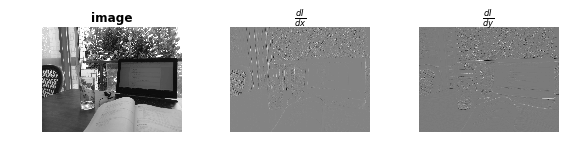

In [72]:
plt.figure(figsize=(8,3))

plt.subplot(131)   #(131)=(1,3,1)= (1,3) 第 1個
plt.axis('off')
plt.title('image')
plt.imshow(image, cmap='gray')

plt.subplot(132)   #(131)=(1,3,2)= (1,3) 第 2個   
plt.axis('off')
plt.title(r'$\frac{dI}{dx}$')
plt.imshow(dx, cmap='gray')

plt.subplot(133)   #(131)=(1,3,3)= (1,3) 第 3個
plt.axis('off')
plt.title(r'$\frac{dI}{dy}$')
plt.imshow(dy, cmap='gray')

plt.tight_layout()
plt.show()

### Creating and applying your own filter

In [76]:
import math, cv2, numpy as np, matplotlib.pyplot as plt
image = cv2.imread('./275725.jpg')

In [89]:
#create an 11x11 sharpening kernel
KSIZE = 11
ALPHA = 2

kernel = cv2.getGaussianKernel(KSIZE,0)  #(n, sigma) sigma=0 => 預設的高斯
kernel = -ALPHA * kernel @ kernel.T      #python3 中 矩阵A和B的乘法可以直接用A@B  (np.dot)
kernel[KSIZE//2, KSIZE//2] += 1 + ALPHA

filtered = cv2.filter2D(image, -1, kernel)

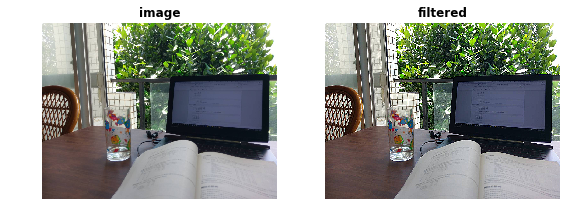

In [90]:
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.axis('off')
plt.title('image')
plt.imshow(image[:,:,[2,1,0]])

plt.subplot(122)
plt.axis('off')
plt.title('filtered')
plt.imshow(filtered[:,:,[2,1,0]])

plt.tight_layout(True)
plt.show()

### Processing images with real-valued Gabor filters

In [94]:
import math, cv2, numpy as np, matplotlib.pyplot as plt
image = cv2.imread('./275725.jpg',0).astype(np.float32)/255

In [95]:
#construct the real-valued gabor filter kernel, Normalize the kernel
kernel = cv2.getGaborKernel((21,21), 5, 1, 10, 1, 0, cv2.CV_32F)
kernel /= math.sqrt((kernel * kernel).sum())

filtered = cv2.filter2D(image, -1, kernel)

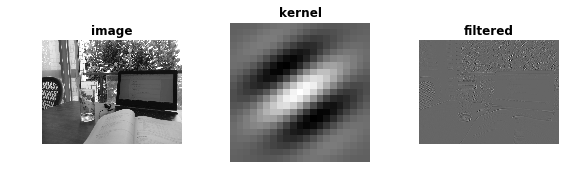

In [96]:
plt.figure(figsize=(8,3))
plt.subplot(131)
plt.axis('off')
plt.title('image')
plt.imshow(image, cmap='gray')

plt.subplot(132)
plt.axis('off')
plt.title('kernel')
plt.imshow(kernel, cmap='gray')

plt.subplot(133)
plt.axis('off')
plt.title('filtered')
plt.imshow(filtered, cmap='gray')

plt.tight_layout()
plt.show()

### Going from the spatial to the frequency domain(and black) using discrete Fourier tansform

### Manipulating image frequencies for image filtration(P175)

### Processing images with different thresholds
有時候由於拍照時光線不均，所以影像每個區域的灰階值基準不同，這時很難找到一個閾值能適用整張影像，然後得到良好的二值化結果，這時我們可以將影像分成幾個區域，每個區域有各自的閾值，再分別將各個區域進行二值化，OpenCV用adaptiveThreshold()函式來進行此作法<br>

OpenCV調整閾值<br>
void adaptiveThreshold(InputArray src, OutputArray dst, double maxValue, int adaptiveMethod, int thresholdType, int blockSize, double C)<br>

src：輸入圖，只能輸入8位元單通道圖。<br>
dst：輸出圖，尺寸大小、深度會和輸入圖相同。<br>
maxValue：最大值，adaptiveThreshold會將像素分成0和maxValue。<br>
adaptiveMethod：區域閾值方法：可以選擇ADAPTIVE_THRESH_MEAN_C或ADAPTIVE_THRESH_GAUSSIAN_C，兩者決定閾值的方式不同。<br>
thresholdType：二值化型態：有THRESH_BINARY和THRESH_BINARY_INV兩種型態可選。<br>
blockSize：區域尺寸，用幾個像素來決定閾值，只能選擇奇數像3、5、7……等。<br>
C：常數，計算閾值時，要從平均或加權平均減去的數。<br>
http://monkeycoding.com/?p=603

In [106]:
import math, cv2, numpy as np, matplotlib.pyplot as plt
image = cv2.imread('./275725.jpg',0)

In [107]:
thr, mask = cv2.threshold(image, 200 ,1, cv2.THRESH_BINARY)
print('Threshold used', thr)
adapt_mask = cv2.adaptiveThreshold(image, 255 ,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,10)

Threshold used 200.0


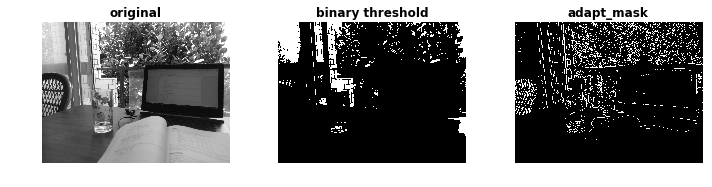

In [109]:
plt.figure(figsize=(10,3))
plt.subplot(131)
plt.axis('off')
plt.title('original')
plt.imshow(image, cmap='gray')

plt.subplot(132)
plt.axis('off')
plt.title('binary threshold')
plt.imshow(mask, cmap='gray')

plt.subplot(133)
plt.axis('off')
plt.title('adapt_mask')
plt.imshow(adapt_mask, cmap='gray')

plt.tight_layout()
plt.show()


### Morphological operators (P186)

### Binary images-image masks and binary operation (P192)

In [110]:
import math, cv2, numpy as np, matplotlib.pyplot as plt

In [111]:
circle_image = np.zeros((500,500),np.uint8)
cv2.circle(circle_image, (250,250),100,255,-1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [112]:
rect_image = np.zeros((500,500),np.uint8)
cv2.rectangle(rect_image, (100,100),(400,250),255,-1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [114]:
circle_and_rect_image = circle_image & rect_image

In [115]:
circle_or_rect_image = circle_image | rect_image

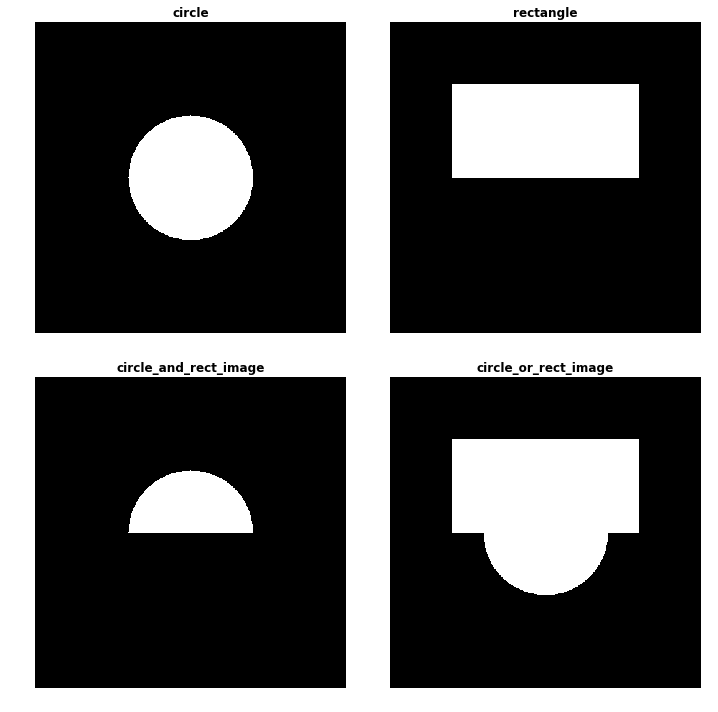

In [116]:
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.axis('off')
plt.title('circle')
plt.imshow(circle_image, cmap='gray')

plt.subplot(222)
plt.axis('off')
plt.title('rectangle')
plt.imshow(rect_image, cmap='gray')

plt.subplot(223)
plt.axis('off')
plt.title('circle_and_rect_image')
plt.imshow(circle_and_rect_image, cmap='gray')

plt.subplot(224)
plt.axis('off')
plt.title('circle_or_rect_image')
plt.imshow(circle_or_rect_image, cmap='gray')

plt.tight_layout()
plt.show()